In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('13-car_evaluation.csv')

In [3]:
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [4]:
df.shape

(1727, 7)

In [5]:
col=['buying','maint','doors','persons','lug_boot','safety','class']

In [6]:
old_cols=df.columns

In [7]:
for i,new_name in enumerate(col):
    df=df.rename(columns={old_cols[i]:new_name})


In [8]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [10]:
df['doors'].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [11]:
for col in df.columns:
    print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [12]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [13]:
(df['doors']=='5more').sum()

432

In [14]:
df['doors']=df['doors'].replace('5more','5')

In [15]:
df['doors'].unique()

array(['2', '3', '4', '5'], dtype=object)

In [16]:
df['doors']=df['doors'].astype('int64')

In [17]:
df['doors'].dtype

dtype('int64')

In [18]:
df['persons']=df['persons'].replace('more','5')

In [19]:
df['persons']=df['persons'].astype('int64')

In [20]:
df['persons'].dtype

dtype('int64')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   int64 
 3   persons   1727 non-null   int64 
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: int64(2), object(5)
memory usage: 94.6+ KB


<Axes: xlabel='buying', ylabel='maint'>

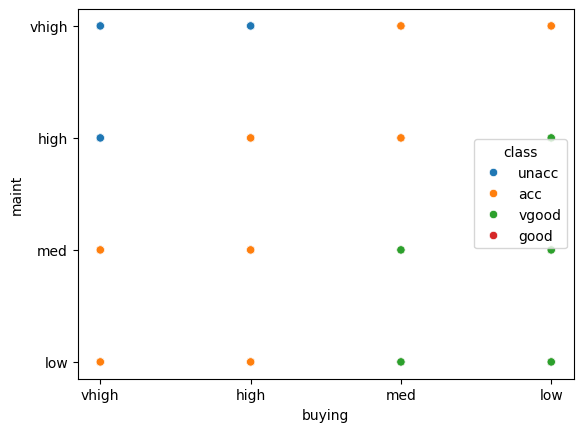

In [22]:
sns.scatterplot(x=df["buying"],y=df["maint"],hue=df['class'])


<Axes: xlabel='buying'>

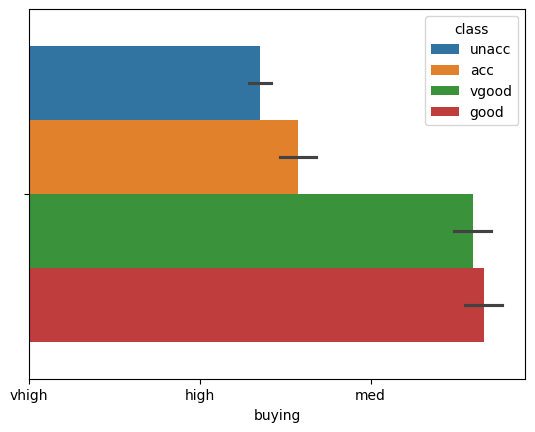

In [23]:
sns.barplot(x=df["buying"],hue=df['class'])


In [24]:
X=df.drop('class',axis=1)
y=df['class']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [27]:
X_train.shape

(1295, 6)

In [28]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [32]:
categorical_cols=["buying","maint","lug_boot","safety"]
numerical_cols=["doors","persons"]
ordinal_encoder=OrdinalEncoder(categories=[
    ["low","med","high","vhigh"],#buying
    ["low","med","high","vhigh"],#maint
    ['small','med','big'],   #lug_boot
    ['low','med','high' ]#safety 
])

In [34]:
preprocessor=ColumnTransformer(
    transformers=[
        ('transformation_name_doesnt_matter',ordinal_encoder,categorical_cols),
    ],remainder="passthrough")
X_train_transformed=preprocessor.fit_transform(X_train)
X_test_transformed=preprocessor.fit_transform(X_test)

In [31]:
for col in categorical_cols:
    print(df[col].unique())

['vhigh' 'high' 'med' 'low']
['vhigh' 'high' 'med' 'low']
['small' 'med' 'big']
['med' 'high' 'low']


In [36]:
pd.DataFrame(X_train_transformed)[4].unique()

array([4., 5., 3., 2.])

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
tree_model=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [39]:
tree_model.fit(X_train_transformed,y_train)

DecisionTreeClassifier(max_depth=3)

In [40]:
y_pred=tree_model.predict(X_test_transformed)

In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [42]:
print(accuracy_score(y_test,y_pred))

0.8009259259259259


In [43]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 49   0  47   0]
 [ 15   0   0   0]
 [ 11   0 297   0]
 [ 13   0   0   0]]
              precision    recall  f1-score   support

         acc       0.56      0.51      0.53        96
        good       0.00      0.00      0.00        15
       unacc       0.86      0.96      0.91       308
       vgood       0.00      0.00      0.00        13

    accuracy                           0.80       432
   macro avg       0.36      0.37      0.36       432
weighted avg       0.74      0.80      0.77       432



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[Text(0.3333333333333333, 0.875, 'safety <= 0.5\ngini = 0.463\nsamples = 1295\nvalue = [288, 54, 901, 52]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 434\nvalue = [0, 0, 434, 0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'persons <= 3.0\ngini = 0.586\nsamples = 861\nvalue = [288, 54, 467, 52]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 282\nvalue = [0, 0, 282, 0]'),
 Text(0.6666666666666666, 0.375, 'buying <= 1.5\ngini = 0.634\nsamples = 579\nvalue = [288, 54, 185, 52]'),
 Text(0.5, 0.125, 'gini = 0.648\nsamples = 296\nvalue = [155, 54, 35, 52]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.498\nsamples = 283\nvalue = [133, 0, 150, 0]')]

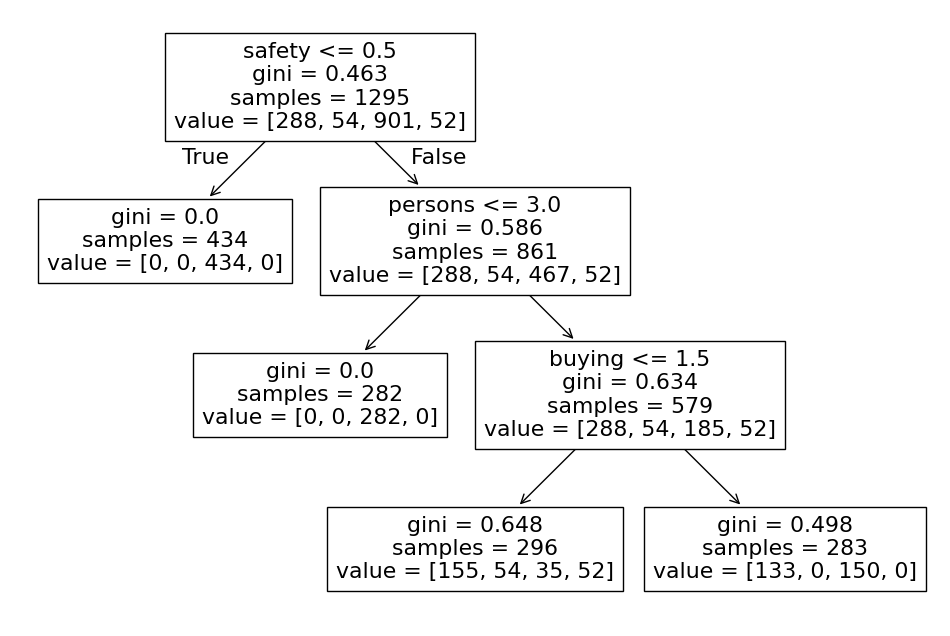

In [50]:
plt.figure(figsize=(12,8))
from sklearn import tree
columns_names=categorical_cols+numerical_cols
tree.plot_tree(tree_model.fit(X_train_transformed,y_train),feature_names=columns_names)

In [51]:
param={'criterion':['gini','entropy','log_loss'],
       'splitter':['best','random'],
       'max_depth':[1,2,3,4,5,15,None],
       'max_features':['sqrt','log2',None]
      }

In [56]:
from sklearn.model_selection import GridSearchCV


In [65]:
grid=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param,cv=5,scoring='accuracy')

In [66]:
#GridSearchCV??

In [67]:
import warnings
warnings.filterwarnings("ignore")
grid.fit(X_train_transformed,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 15, None],
                         'max_features': ['sqrt', 'log2', None],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [68]:
grid.best_params_

{'criterion': 'log_loss',
 'max_depth': 15,
 'max_features': None,
 'splitter': 'best'}

In [69]:
y_pred=grid.predict(X_test_transformed)

In [70]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9745370370370371
[[ 91   0   4   1]
 [  1  13   1   0]
 [  4   0 304   0]
 [  0   0   0  13]]
              precision    recall  f1-score   support

         acc       0.95      0.95      0.95        96
        good       1.00      0.87      0.93        15
       unacc       0.98      0.99      0.99       308
       vgood       0.93      1.00      0.96        13

    accuracy                           0.97       432
   macro avg       0.97      0.95      0.96       432
weighted avg       0.97      0.97      0.97       432



In [71]:
tree_model_new = DecisionTreeClassifier(criterion="entropy",max_depth=None, max_features=None, splitter="best")


In [72]:

tree_model_new.fit(X_train_transformed, y_train)
y_pred = tree_model_new.predict(X_test_transformed)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9606481481481481
[[ 88   0   6   2]
 [  1  13   1   0]
 [  6   0 302   0]
 [  1   0   0  12]]
              precision    recall  f1-score   support

         acc       0.92      0.92      0.92        96
        good       1.00      0.87      0.93        15
       unacc       0.98      0.98      0.98       308
       vgood       0.86      0.92      0.89        13

    accuracy                           0.96       432
   macro avg       0.94      0.92      0.93       432
weighted avg       0.96      0.96      0.96       432



[Text(0.609375, 0.9615384615384616, 'safety <= 0.5\nentropy = 1.224\nsamples = 1295\nvalue = [288, 54, 901, 52]'),
 Text(0.5946691176470589, 0.8846153846153846, 'entropy = 0.0\nsamples = 434\nvalue = [0, 0, 434, 0]'),
 Text(0.6020220588235294, 0.9230769230769231, 'True  '),
 Text(0.6240808823529411, 0.8846153846153846, 'persons <= 3.0\nentropy = 1.502\nsamples = 861\nvalue = [288, 54, 467, 52]'),
 Text(0.6167279411764706, 0.9230769230769231, '  False'),
 Text(0.609375, 0.8076923076923077, 'entropy = 0.0\nsamples = 282\nvalue = [0, 0, 282, 0]'),
 Text(0.6387867647058824, 0.8076923076923077, 'buying <= 1.5\nentropy = 1.659\nsamples = 579\nvalue = [288, 54, 185, 52]'),
 Text(0.3952205882352941, 0.7307692307692307, 'maint <= 1.5\nentropy = 1.742\nsamples = 296\nvalue = [155, 54, 35, 52]'),
 Text(0.20955882352941177, 0.6538461538461539, 'safety <= 1.5\nentropy = 1.754\nsamples = 149\nvalue = [49.0, 54.0, 6.0, 40.0]'),
 Text(0.08823529411764706, 0.5769230769230769, 'lug_boot <= 0.5\nentropy 

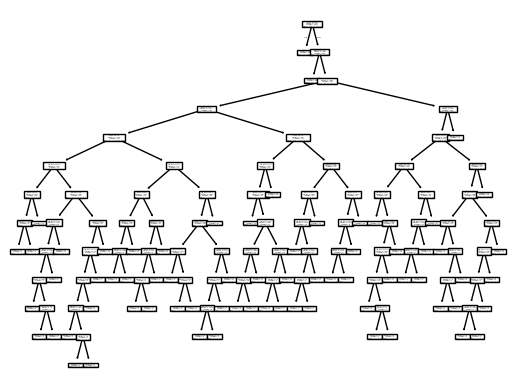

In [74]:
tree.plot_tree(tree_model_new.fit(X_train_transformed, y_train),feature_names=columns_names)


In [78]:
df_new = pd.read_csv("11-iris (1).csv")


In [79]:
df_new.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [80]:

X=df_new.drop(["Id", "Species"], axis=1)
y=df_new["Species"]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


In [82]:
tree_model = DecisionTreeClassifier()


In [83]:
tree_model = DecisionTreeClassifier()


[Text(0.3076923076923077, 0.9285714285714286, 'PetalLengthCm <= 2.45\ngini = 0.665\nsamples = 120\nvalue = [40, 37, 43]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.2692307692307693, 0.8571428571428572, 'True  '),
 Text(0.38461538461538464, 0.7857142857142857, 'PetalLengthCm <= 4.75\ngini = 0.497\nsamples = 80\nvalue = [0, 37, 43]'),
 Text(0.34615384615384615, 0.8571428571428572, '  False'),
 Text(0.15384615384615385, 0.6428571428571429, 'PetalWidthCm <= 1.65\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'PetalWidthCm <= 1.75\ngini = 0.159\nsamples = 46\nvalue = [0, 4, 42]'),
 Text(0.38461538461538464, 0.5, 'SepalWidthCm <= 2.65\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(0.3076923076923077, 0.35714285714285

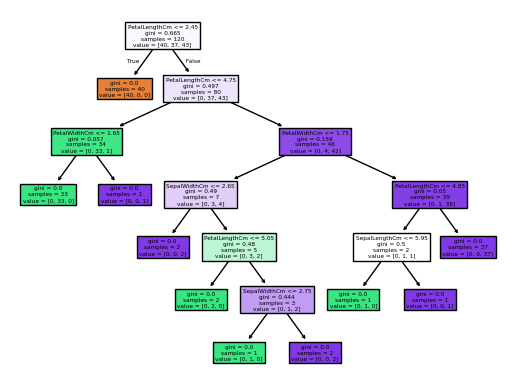

In [85]:
tree.plot_tree(tree_model.fit(X_train, y_train),feature_names=X_train.columns, filled=True)



In [86]:

y_pred = tree_model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9666666666666667
[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.88      1.00      0.93         7

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [87]:
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9333333333333333
[[10  0  0]
 [ 0 11  2]
 [ 0  0  7]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.78      1.00      0.88         7

       accuracy                           0.93        30
      macro avg       0.93      0.95      0.93        30
   weighted avg       0.95      0.93      0.93        30



[Text(0.375, 0.875, 'PetalLengthCm <= 2.45\ngini = 0.665\nsamples = 120\nvalue = [40, 37, 43]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'PetalLengthCm <= 4.75\ngini = 0.497\nsamples = 80\nvalue = [0, 37, 43]'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'PetalWidthCm <= 1.65\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.375, 'PetalWidthCm <= 1.75\ngini = 0.159\nsamples = 46\nvalue = [0, 4, 42]'),
 Text(0.625, 0.125, 'gini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(0.875, 0.125, 'gini = 0.05\nsamples = 39\nvalue = [0, 1, 38]')]

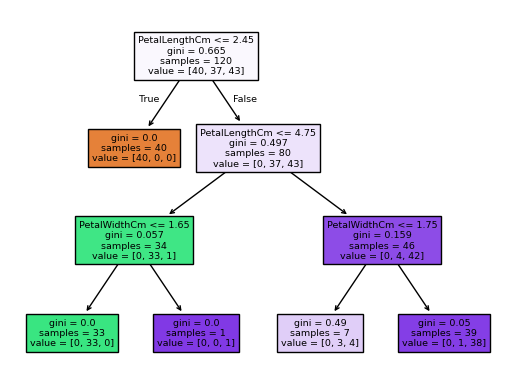

In [88]:
tree.plot_tree(tree_model.fit(X_train, y_train),feature_names=X_train.columns, filled=True)
